In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

In [2]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [3]:
URL = r"https://www.dropbox.com/s/0oe92zziik5mwhf/opencv_bootcamp_assets_NB4.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), "opencv_bootcamp_assets_NB4.zip")

# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

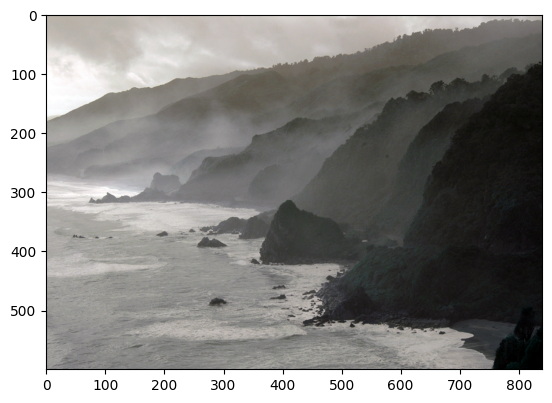

In [7]:
image = cv2.imread("New_Zealand_Coast.jpg",cv2.IMREAD_COLOR)
plt.imshow(image)

float64
uint8


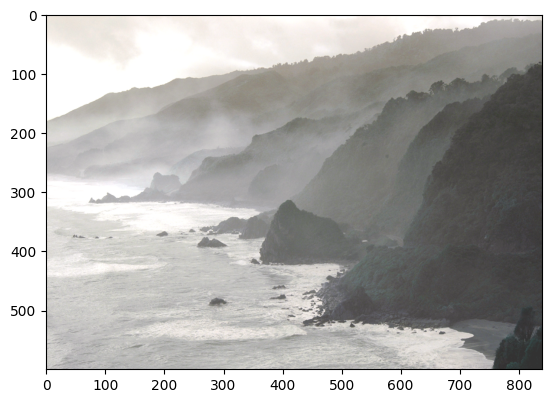

In [23]:
# Brightness
#Here we are going to tune the brightness of the image.
#by simply adding the values
#lets get shape of the image and np.ones() of same shape

brightness = np.ones(image.shape)*50
print(brightness.dtype) #gives float 64 but cv2 only accepts uint8

brightness = np.ones(image.shape,dtype='uint8')*50
print(brightness.dtype) # Now its converted. just add it to image matrix using cv2.add() method

brightened_image = cv2.add(image,brightness) #Accepts two arguments, imageSrc,matrix with same shape
plt.imshow(brightened_image)

Text(0.5, 1.0, 'original')

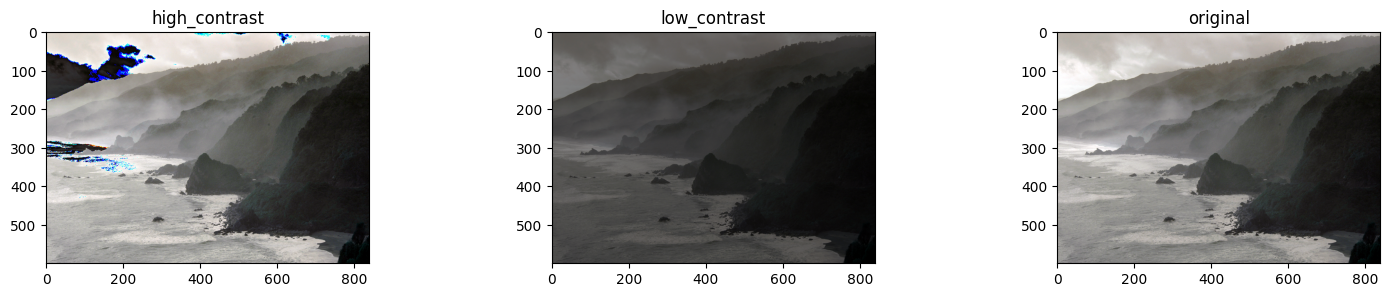

In [39]:
# Contrast
#Contrast is nothing but multiplication of Matrices with image Matrix
# Lets create np.ones()
image1 = image.copy()
increased_contrast = np.ones(image1.shape)*1.2
decreased_contrast = np.ones(image1.shape)*0.5

ic_img = np.uint8(cv2.multiply(np.float64(image1),increased_contrast)) #The datatypes of image1 and np.ones() must be same
dc_img = np.uint8(cv2.multiply(np.float64(image1),decreased_contrast))

plt.figure(figsize=[25,3])
plt.subplot(141);plt.imshow(ic_img);plt.title('high_contrast')
plt.subplot(142);plt.imshow(dc_img);plt.title('low_contrast')
plt.subplot(143);plt.imshow(image1);plt.title('original')


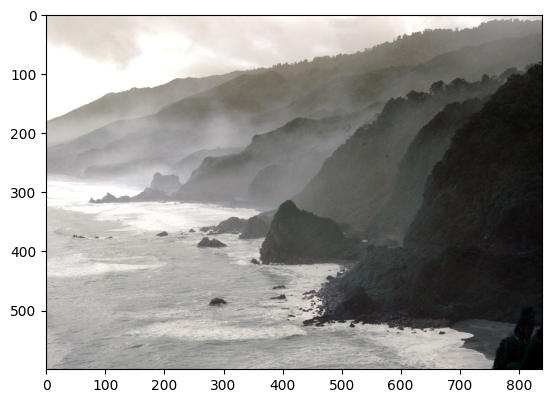

In [44]:
#The darker abnormal blacks are occurring due to the value going above 255 falling back to zeroes
#To Address this we are going to use clip() method. which clips values to 255 if increased
ic_img_m = np.uint8(np.clip(cv2.multiply(np.float64(image1),increased_contrast),0,255))
# np.uint8() -> for conversion
#The Above Statement represents, np.clip()->accepts uint8matrix,low_threshold,higher_threshold.
# cv2.multiply() -> used to multiply the original image matrix with generated matrix
plt.imshow(ic_img_m)

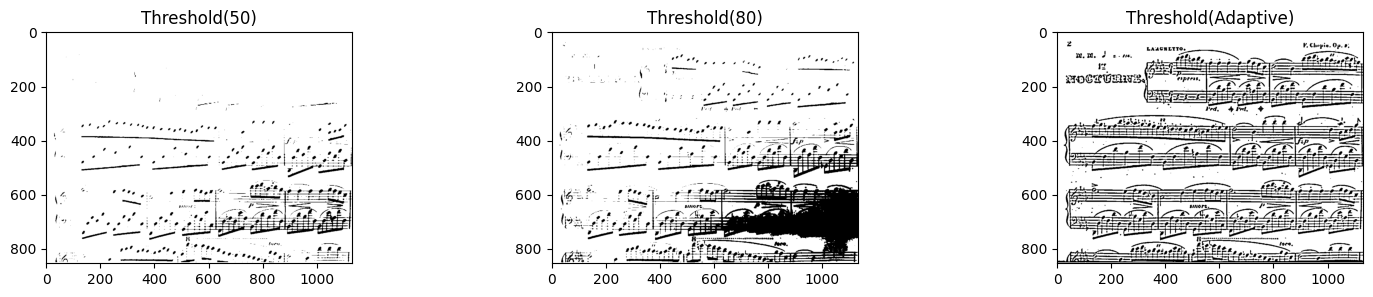

In [63]:
#Thresholds
image_t = cv2.imread('Piano_Sheet_Music.png',cv2.IMREAD_GRAYSCALE)
#So this is the image. let us make some limits, from 0 to 255, threshold limit = 50,
#maximum threshold = 255, lets see how it works
min,max = 50,255
retval,image_t1 = cv2.threshold(image_t,min,max,cv2.THRESH_BINARY)
min,max = 80,255 
retval,image_t2 = cv2.threshold(image_t,min,max,cv2.THRESH_BINARY)
#Need to learn adaptiveThreshold more.
image_t3 = cv2.adaptiveThreshold(image_t, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15,7)

plt.figure(figsize=[25,3])
plt.subplot(141);plt.imshow(image_t1,cmap='gray');plt.title('Threshold(50)');
plt.subplot(142);plt.imshow(image_t2,cmap='gray');plt.title('Threshold(80)');
plt.subplot(143);plt.imshow(image_t3,cmap='gray');plt.title('Threshold(Adaptive)');

(200, 499)


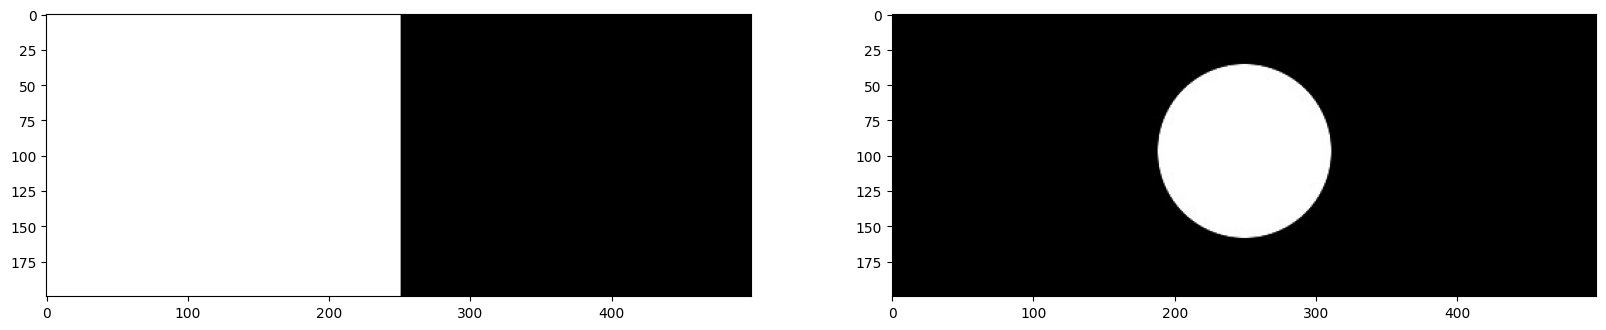

In [64]:
#Bitwise Operations
img_rec = cv2.imread("rectangle.jpg", cv2.IMREAD_GRAYSCALE)

img_cir = cv2.imread("circle.jpg", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=[20, 5])
plt.subplot(121);plt.imshow(img_rec, cmap="gray")
plt.subplot(122);plt.imshow(img_cir, cmap="gray")
print(img_rec.shape)

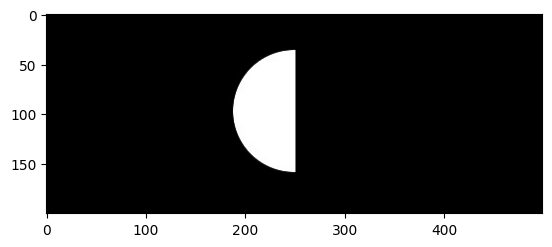

In [67]:
#Bitwise 'and' Operation
#if either images have 255 then returns 255 else will be 0
image_and = cv2.bitwise_and(img_rec,img_cir)
plt.imshow(image_and,cmap='gray')

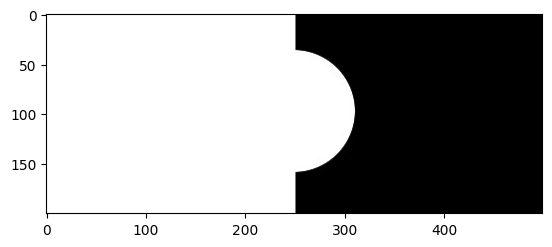

In [69]:
#Bitwise 'or' Operation
# If any of them has 255 stays 255
image_or = cv2.bitwise_or(img_rec,img_cir)
plt.imshow(image_or,cmap='gray')

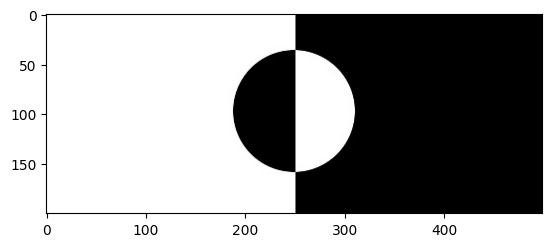

In [71]:
#Bitwise 'XOR' Operation
#Returns white (255) if the pixel is white in ONE image, but NOT BOTH (Exclusive OR)
image_xor = cv2.bitwise_xor(img_rec,img_cir)
plt.imshow(image_xor,cmap='gray')

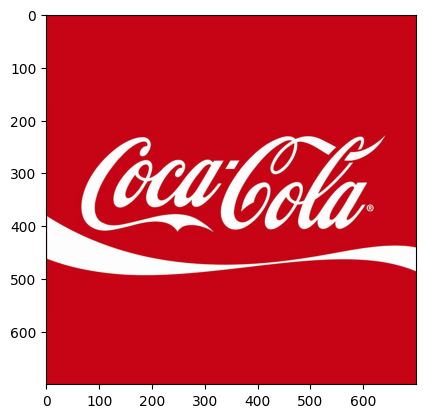

In [77]:
#So lets overlap with other Image.
cocacola = cv2.imread('coca-cola-logo.png',cv2.IMREAD_COLOR)
cocacola_rgb = cv2.cvtColor(cocacola, cv2.COLOR_BGR2RGB)

plt.imshow(cocacola_rgb)

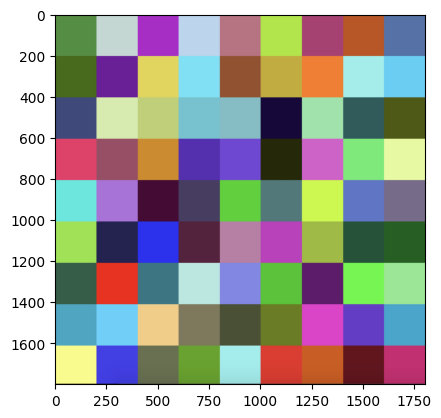

In [80]:
backimg = cv2.imread('checkerboard_color.png',cv2.IMREAD_COLOR)
backimg_rgb = cv2.cvtColor(backimg,cv2.COLOR_BGR2RGB)
plt.imshow(backimg_rgb)

In [82]:
backimg_rgb = cv2.resize(backimg_rgb,(cocacola_rgb.shape[0],cocacola_rgb.shape[1]),interpolation=cv2.INTER_AREA)
backimg_rgb.shape

(700, 700, 3)

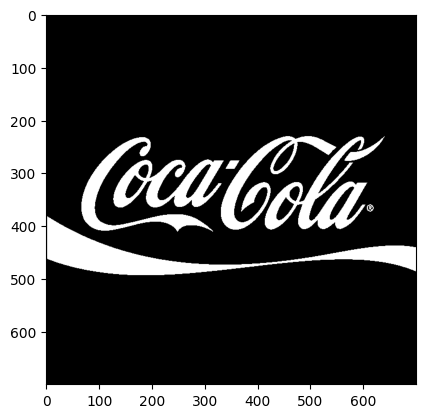

In [89]:
#create mask of original image
img_gray = cv2.cvtColor(cocacola_rgb,cv2.COLOR_RGB2GRAY)
retval , image_mask = cv2.threshold(img_gray, 125,255,cv2.THRESH_BINARY)
plt.imshow(image_mask , cmap='gray')

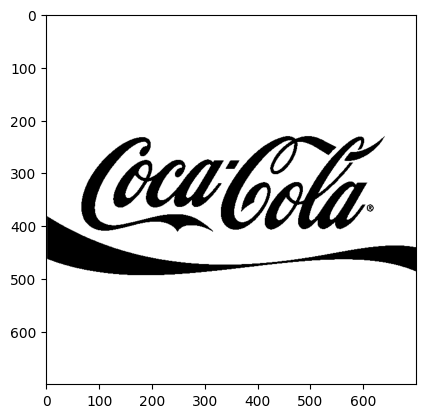

In [92]:
#INVERSE MASK
mask_inv = cv2.bitwise_not(image_mask)
plt.imshow(mask_inv ,cmap='gray')

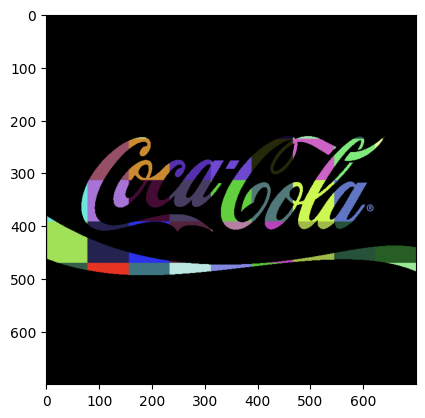

In [97]:
background = cv2.bitwise_and(backimg_rgb,backimg_rgb,mask = image_mask)
#and only returns white(255) if corresponding pixel in both images is 255 else stays same

plt.imshow(background)

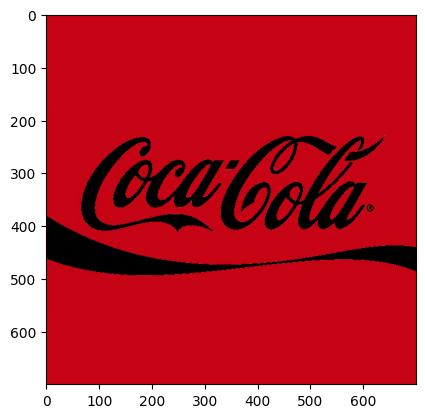

In [100]:
foreground = cv2.bitwise_and(cocacola_rgb,cocacola_rgb,mask=mask_inv)
#again 255's replaced with image values
plt.imshow(foreground)
# now again add both.

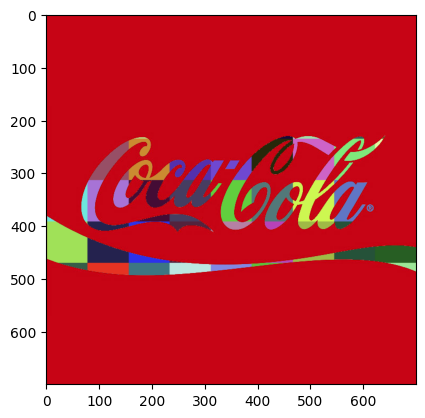

In [103]:
new_image = cv2.add(foreground,background)
#by adding this 0's are summed to values of background
plt.imshow(new_image)